In [2]:
# Lab 5 | EDA & Visualisation

In [3]:
import pandas as pd
df = pd.read_csv("../data/students.csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


In [7]:
df.info()
count = df.isna().sum()
print(count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64


The GPA column has the most missing values. This might be because there are new students who haven't completed enough of their classes to have a GPA yet or because there are transfer students whose data hasn't transferred over yet. 

In [8]:
columns = ['age', 'gpa']
summary_data = {
    'count': df[columns].count(),
    'mean': df[columns].mean(),
    'median': df[columns].median(),
    'variance': df[columns].var(),
    'std_dev': df[columns].std(),
    'min': df[columns].min(),
    'max': df[columns].max()
}
summary = pd.DataFrame(summary_data)
print(summary)


     count       mean  median  variance   std_dev    min    max
age    100  16.130000  16.000  1.892020  1.375507  14.00  18.00
gpa     90   2.624667   2.665  0.227432  0.476898   1.63   3.93


In [10]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.0 MB/s eta 0:00:00


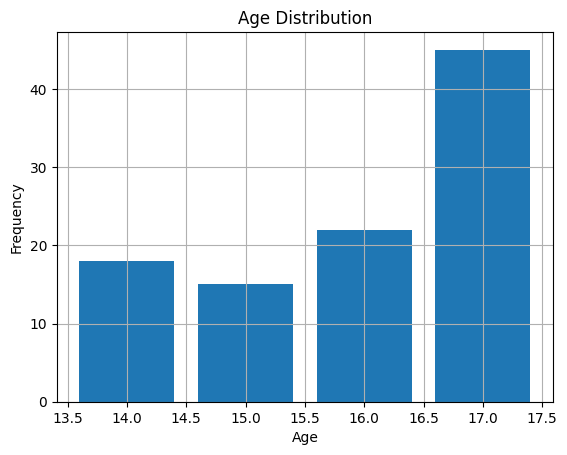

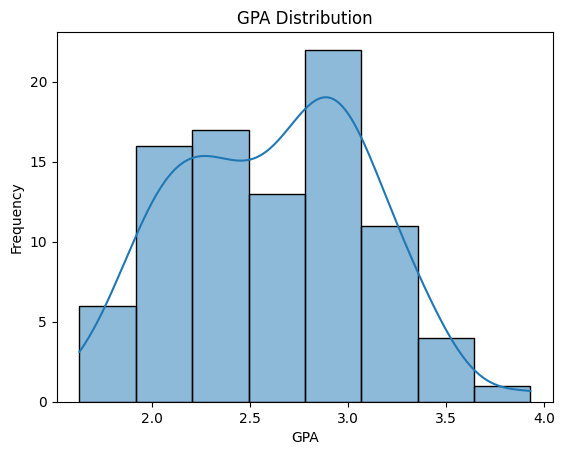

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df['age'].hist(bins=range(14, 19), align='left', rwidth=0.8)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df["gpa"], kde=True)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

For the histogram of age, it is interesting that there are double 17 year olds than any other age individually. 

For the histogram of GPA, it is interesting that it is a bimodal distribution, with a peak at around 3.0 GPA and another peak at around 2.25 GPA. 

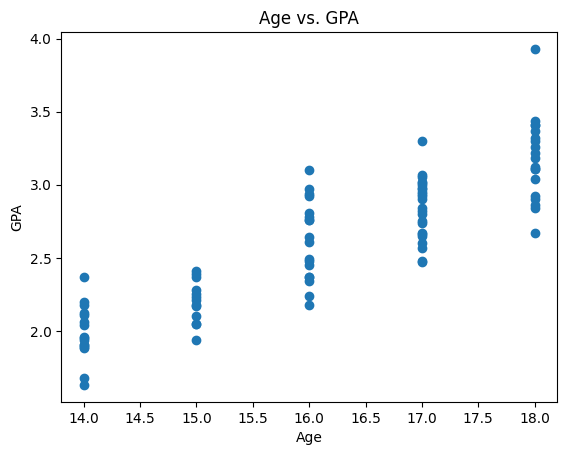

Pearson correlation: 0.878607534458466


In [12]:
plt.scatter(df['age'], df['gpa'])
plt.title('Age vs. GPA')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.show()


correlation = df['age'].corr(df['gpa'])
print("Pearson correlation:", correlation)

GPA trends up with age in this mini dataset

In [13]:
import numpy as np
df['major'] = df['major'].str.lower()
df['major'] = df['major'].str.strip()
df['major'] = df['major'].replace('', np.nan)
df = df.dropna(subset=['major'])

In [17]:
df.to_csv('../data/students_clean.csv', index=False)
